# ⌨️ Belirli Bir profile_guid İçin Saatlik Key Down Grafiği
Bu notebook, yalnızca belirtilen bir `profile_guid`'e ait olan satırları inceler.
- Sadece `{x}` veya `{x,y}` biçimindeki `key_codes` satırları filtrelenir.
- `key_down` değerleri saatlik gruplara ayrılır ve her saat için grafik çizilir.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

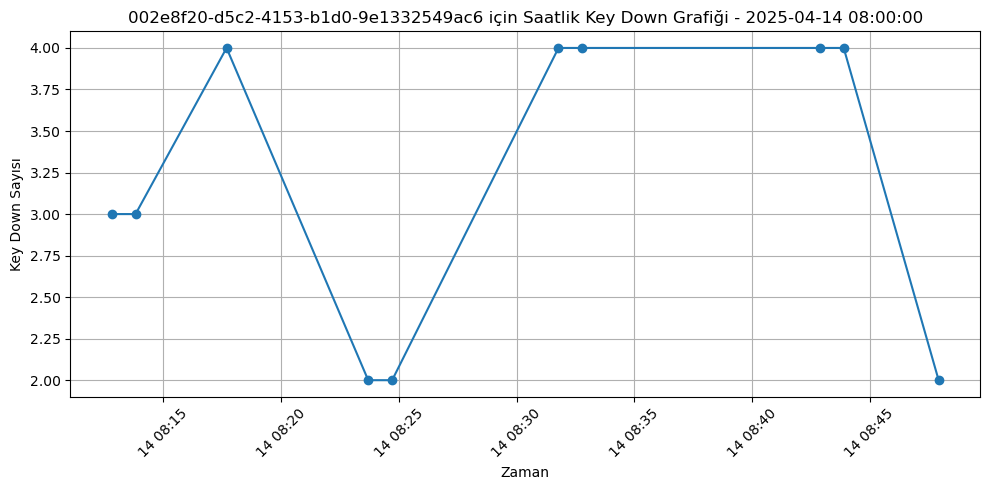

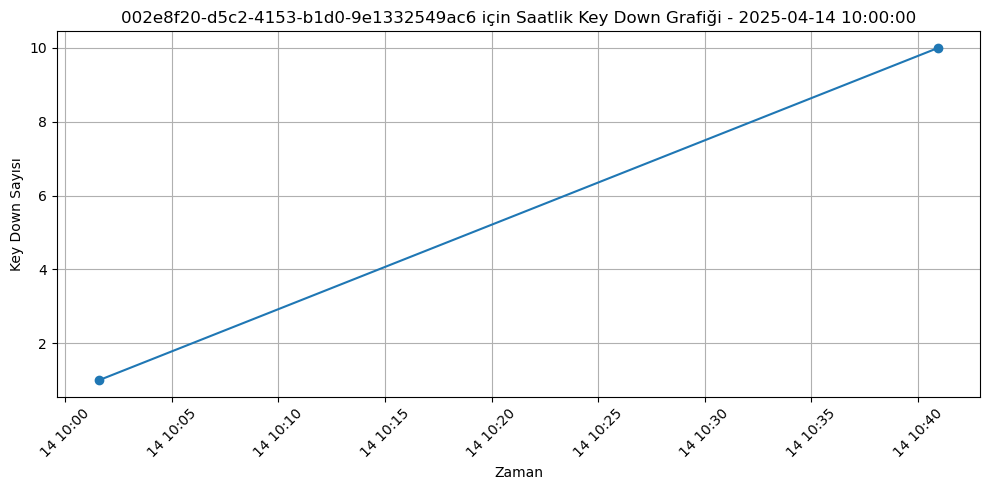

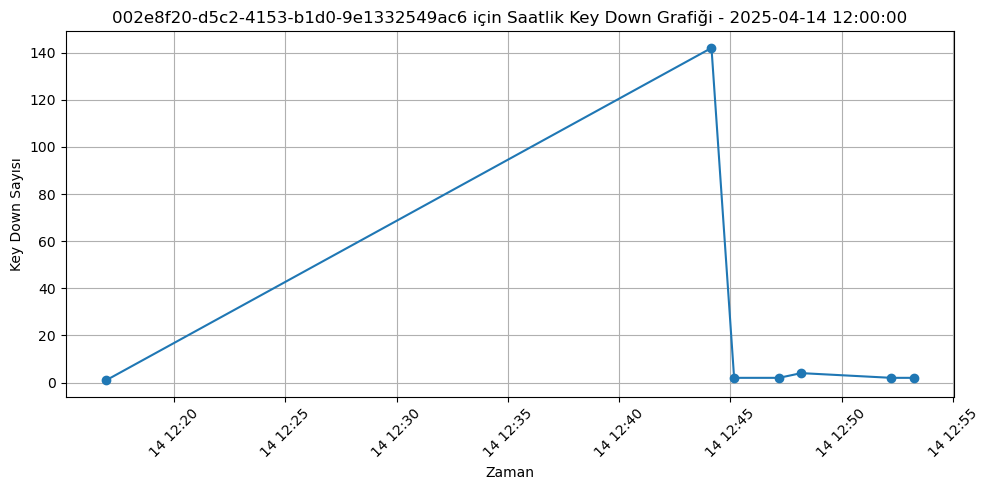

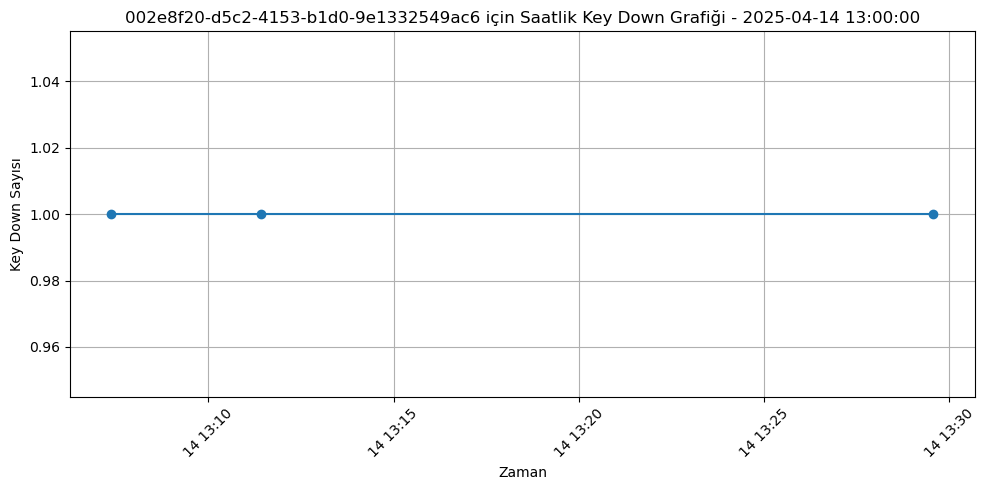

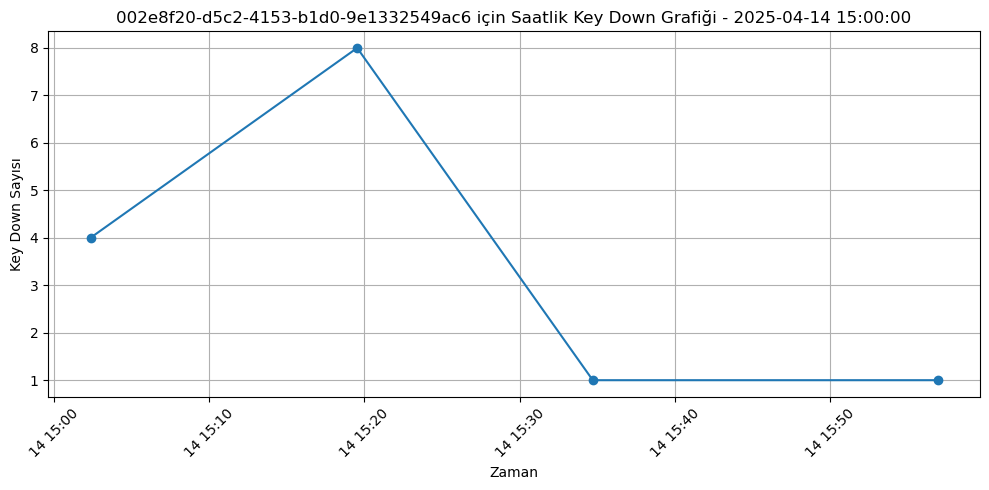

In [18]:
# 📁 CSV yolunu buraya yaz
file_path = "C:/store/git/km-stat-activity/data/real/real_activity_log.csv"  # ← BURAYI DEĞİŞTİR
df = pd.read_csv(file_path)

# 🔍 İncelenecek profile_guid
target_guid = "002e8f20-d5c2-4153-b1d0-9e1332549ac6"  # ← BURAYI DEĞİŞTİR
df = df[df["profile_guid"] == target_guid]

# ✅ Sadece 1 veya 2 elemanlı key_codes satırlarını filtrele
def is_valid_keycodes(s):
    if not isinstance(s, str) or not s.startswith("{"):
        return False
    try:
        content = s.strip("{} ").split(',')
        return 1 <= len(content) <= 2
    except:
        return False

filtered_df = df[df["key_codes"].apply(is_valid_keycodes)]

# 🕒 Zaman ve key_down sütunları ile işlem
if "start_date_time" in filtered_df.columns and "key_down" in filtered_df.columns:
    filtered_df = filtered_df.dropna(subset=["key_down", "start_date_time"])
    filtered_df["start_date_time"] = pd.to_datetime(filtered_df["start_date_time"])
    filtered_df.sort_values("start_date_time", inplace=True)

    # Saatlik gruplama
    filtered_df["hour"] = filtered_df["start_date_time"].dt.floor("h")
    grouped = filtered_df.groupby("hour")

    for hour, group in grouped:
        plt.figure(figsize=(10, 5))
        plt.plot(group["start_date_time"], group["key_down"], marker="o")
        plt.title(f"{target_guid} için Saatlik Key Down Grafiği - {hour}")
        plt.xlabel("Zaman")
        plt.ylabel("Key Down Sayısı")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("start_date_time veya key_down sütunu bulunamadı.")

In [19]:
!jupyter nbconvert --to html keycodes_by_profile_guid_hourly.ipynb


[NbConvertApp] Converting notebook keycodes_by_profile_guid_hourly.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 551246 bytes to keycodes_by_profile_guid_hourly.html
